In [1]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from numpy import linalg as la 
from itertools import chain
import collections

In [9]:
df=pd.read_csv("normalized.csv",usecols=['Metadata_Well','Cells_AreaShape_Area','Metadata_Count_Cells','Cells_Correlation_RWC_DNA_RNA','Cells_RadialDistribution_RadialCV_DNA_3of4'])

In [10]:
df.head()

,Metadata_Well,Metadata_Count_Cells,Cells_AreaShape_Area,Cells_Correlation_RWC_DNA_RNA,Cells_RadialDistribution_RadialCV_DNA_3of4
0,A01,767,-1.06050,-1.768500,-1.77270
1,A02,751,-1.04190,-1.794100,-1.87210
2,A03,699,-0.90102,-1.478600,-1.69760
3,A04,740,-1.02870,-1.275400,-2.02490
4,A05,563,-0.66922,0.017979,0.53855


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
features = ['Cells_AreaShape_Area','Metadata_Count_Cells','Cells_Correlation_RWC_DNA_RNA','Cells_RadialDistribution_RadialCV_DNA_3of4']

In [13]:
x = df.loc[:, features].values
y = df.loc[:,['Metadata_Well']].values
x = StandardScaler().fit_transform(x)

In [22]:
features = x.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00261097, -0.63288279, -0.02453127,  0.72823781],
       [-0.63288279,  1.00261097, -0.58873998, -0.84417923],
       [-0.02453127, -0.58873998,  1.00261097,  0.42960953],
       [ 0.72823781, -0.84417923,  0.42960953,  1.00261097]])

In [23]:
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([2.69088272, 1.04535624, 0.14898028, 0.12522462])

In [24]:
vectors[:5]

array([[ 0.46144447, -0.59477634,  0.4843718 ,  0.44575113],
       [-0.58074812, -0.10567575, -0.27492516,  0.75893373],
       [ 0.34254095,  0.79060111,  0.2264585 ,  0.45423797],
       [ 0.57659892, -0.10011811, -0.79907238,  0.13781649]])

In [27]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.6709688032372402, 0.2606584897059939, 0.037148077482754706, 0.031224629574011144]


In [29]:
projected_1 = x.dot(vectors.T[0])
projected_2 = x.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()

,PC1,PC2,Y
0,-3.245496,-0.805599,A01
1,-3.263525,-0.814977,A02
2,-2.841062,-0.614425,A03
3,-3.141880,-0.380204,A04
4,-0.424929,0.316604,A05


<AxesSubplot: xlabel='Y', ylabel='PC1'>

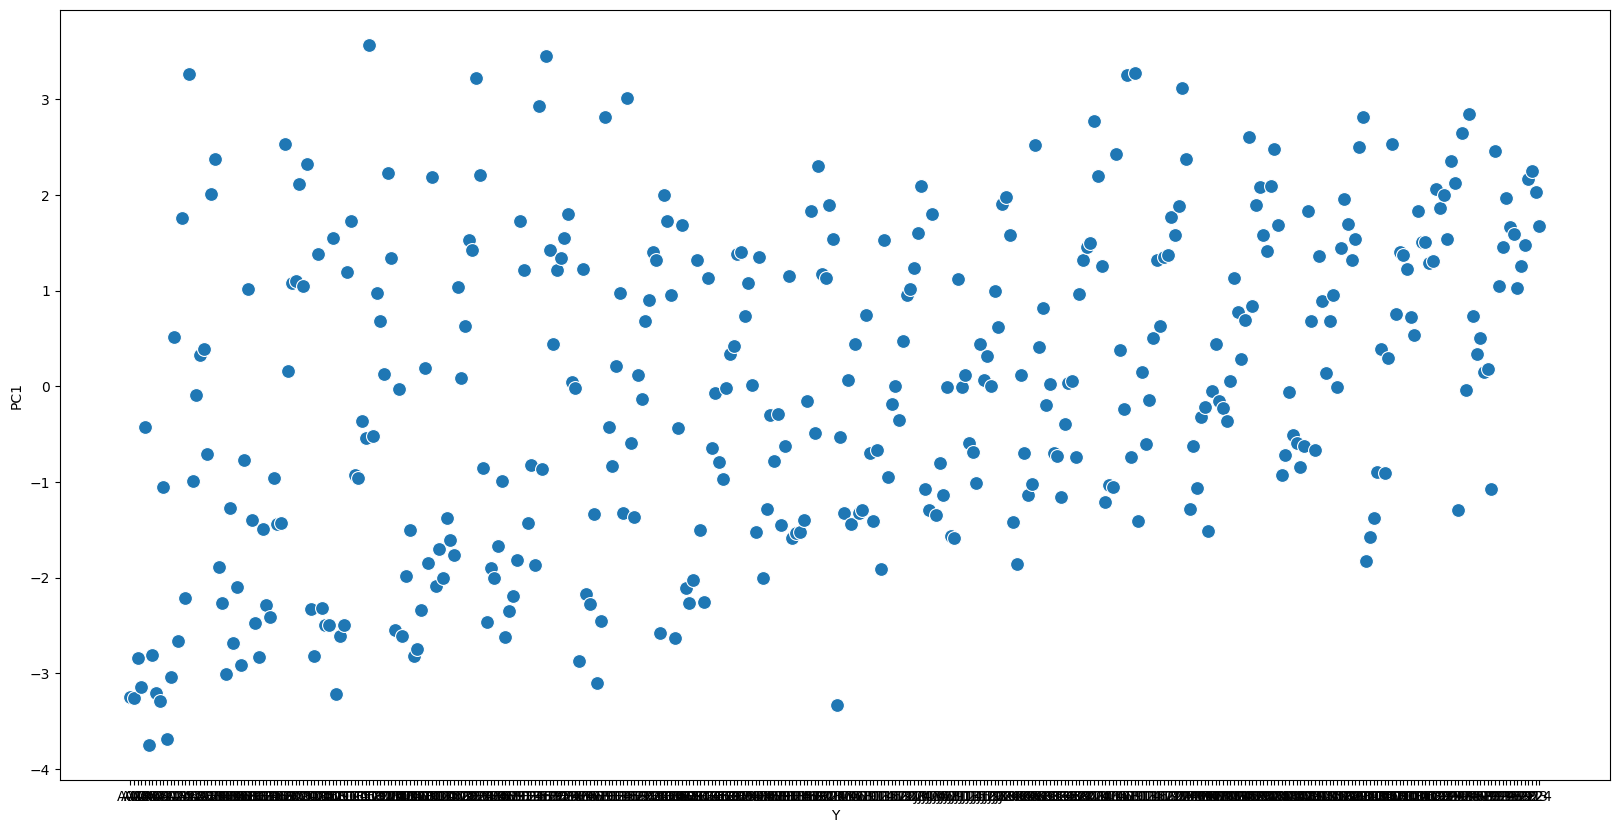

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(data = res['PC1'], x = res['Y'], y = res['PC1'], s =100)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [15]:
finalDf = pd.concat([principalDf, df[['Metadata_Well']]], axis = 1)

In [20]:
finalDf

,principal component 1,principal component 2,Metadata_Well
0,3.245496,0.805599,A01
1,3.263525,0.814977,A02
2,2.841062,0.614425,A03
3,3.141880,0.380204,A04
4,0.424929,-0.316604,A05
...,...,...,...
379,-1.481138,1.565183,P20
380,-2.166115,0.820380,P21
381,-2.256173,0.783847,P22
382,-2.028768,0.754177,P23


<AxesSubplot: xlabel='principal component 1', ylabel='principal component 2'>

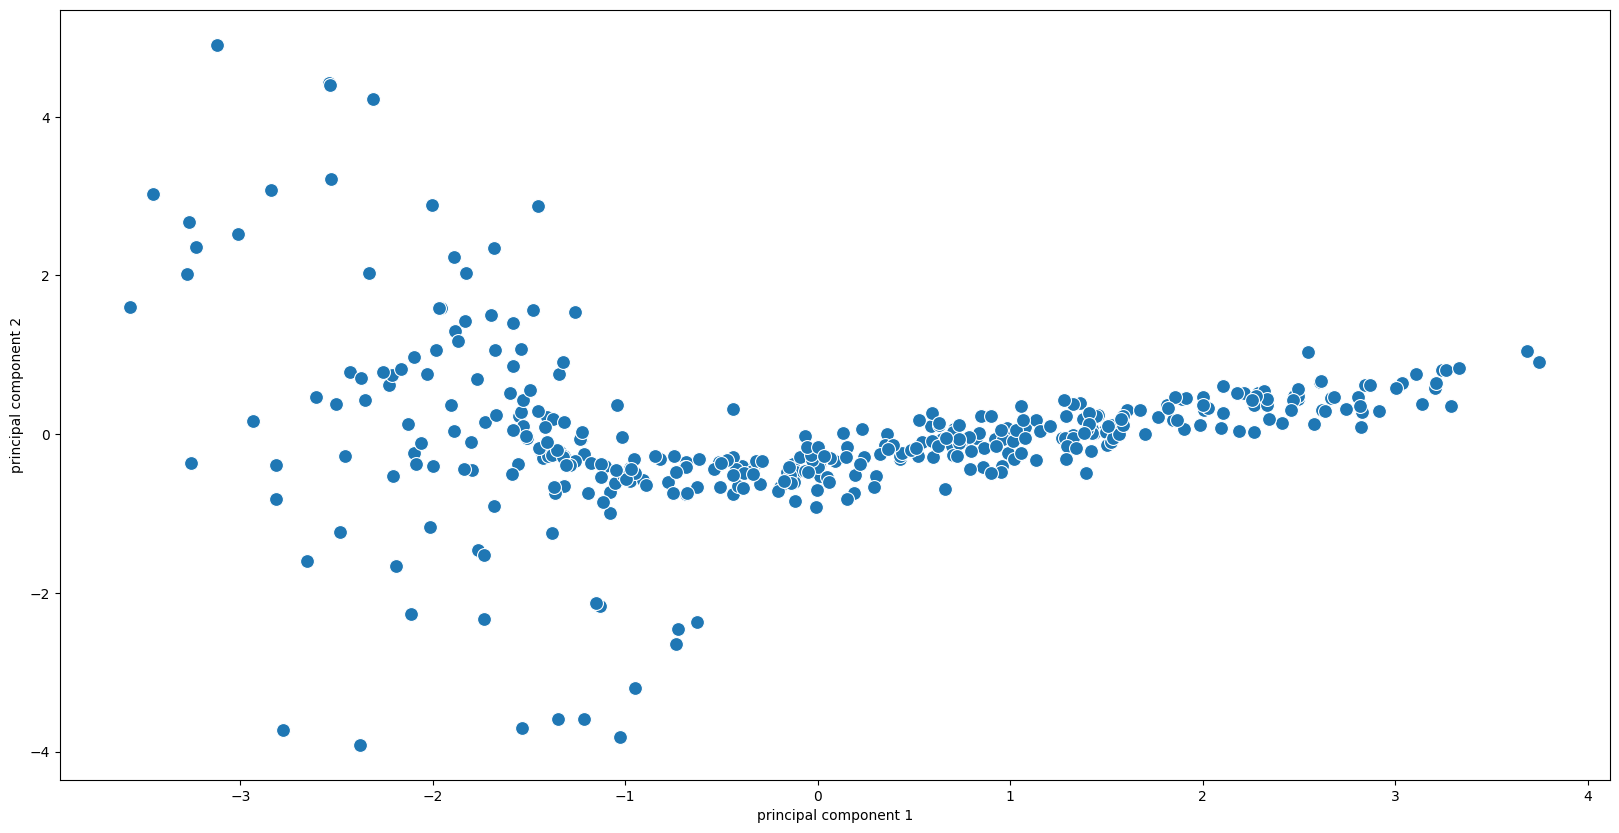

In [48]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data = finalDf, x = finalDf['principal component 1'], y = finalDf['principal component 2'] , s =100)